***Project Description***

Telecom, one of the leading telecom players, understands that customizing offering
is very important for its business to stay competitive.
Currently, InsaidTelecom is seeking to leverage behavioral data from more than 60% of the 50 million mobile devices active daily in India to help its clients better understand and interact with their audiences.


***Consulting Goals***

To help the customer the consultants are expected to have depth of clarity in the underlying data.
How much effort has been put into cleansing and purifying the data will decide how closely have you looked at the data.
How detailed is the observation stated in the submission report and finally how well a group presents their consulting journey.

Please remember this is an analytics consulting hence, your efforts in terms of
finding user behavior is going to directly impact the company's offerings.
Do help the company understand what is the
right way forward and suggest actionable insights from marketing and product terms.

### Data Description

In this assignment, you are going to study the demographics of a user (gender and age) based on their app download and usage behaviors.

The Data is collected from mobile apps that use InsaidTelecom services. 
Due to confidentiality, we won't provide details on how the gender and age data was obtained.
Please treat them as accurate ground truth for prediction. The data schema can be represented in the following table:


1. gender_age_train - Devices and their respective user gender, age and age_group

2. phone_brand_device_model - device ids, brand, and models phone_brand: note that few brands are in Chinese

Brand Name	 Brand English Mapping
- '华为'	'Huawei'
- '小米'	'Xiaomi'
- '三星'	'Samsung'
- 'vivo'	'vivo'
- 'OPPO'	'OPPO'
- '魅族'	'Meizu'
- '酷派'	'Coolpad'
- '乐视'	'LeEco'
- '联想 '	'Lenovo'
- 'HTC'	'HTC'

3. events_data - when a user uses mobile on INSAID Telecom network, the event gets logged in this data.
Each event has an event id, location (lat/long), and the event corresponds to frequency of mobile usage.
timestamp: when the user is using the mobile.

**States to focus for Consulting**

- AndhraPradesh, 
- Pondicherry, 
- Mizoram, 
- AndamanandNicobarIslands, 
- Meghalaya, 
- HimachalPradesh

Download the DataSets for events_data from : events_data.csv
        

        
Download the DataSets for gender_age_train & phone_brand_device_model onto Python by connecting to the below
provided MySQL instance.

           
host	'cpanel.insaid.co'

user	'student'

passwd	'student'

database	'Capstone1'

Use "mysql.connector" package in Python.

In [ ]:
# !pip install mysql-connector-python

**1st Dataset**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------

events_data =  pd.read_csv(filepath_or_buffer = 'C:/Users/0128906/win/DataSets/CDF - Capstone Project/events_data.csv')

# from google.colab import drive
# drive.mount('/content/drive')

# events_data =  pd.read_csv('/content/drive/My Drive/Data Science/CDF - Capstone Project/events_data.csv')


print('Data Shape:', events_data.shape)
events_data.head()

Data Shape: (3252950, 7)


,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


**Observations:**
- No null values in city
- will first solve NULL values present in events_data
- 1st will solve null value in state on the basis of city
- 2nd will solve null value in longitude & latitude on the basis of city
- 3rd will solve null value in device ID on the basis of city, longitude & latitude
- also found the value of +ve and -ve device id we can replace with abs(), but will do later after confirming with Insaid.
- Also Device ID are float.
- also time stamp is object, we need to convert datatype of timestamp

In [2]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [3]:
events_data.describe()

,event_id,device_id,longitude,latitude
count,3.252950e+06,3.252497e+06,3.252527e+06,3.252527e+06
mean,1.626476e+06,1.012200e+17,7.815868e+01,2.168851e+01
std,9.390459e+05,5.316758e+18,4.235570e+00,5.789111e+00
min,1.000000e+00,-9.222957e+18,1.256700e+01,8.190110e+00
25%,8.132382e+05,-4.540611e+18,7.583543e+01,1.780171e+01
50%,1.626476e+06,1.726820e+17,7.726814e+01,2.216454e+01
75%,2.439713e+06,4.861813e+18,8.031916e+01,2.868278e+01
max,3.252950e+06,9.222849e+18,9.545946e+01,4.187190e+01


**Observations:**
- describe() gives output only for Continuous Variables
- so event_id, 
- device_id - will handle with ffill() and bfill() bcoz ID's can never fill like as continuous.
- longitude,
- latitude

**we will be handling missing data for longitude & latitude with mean\median bcoz they are Continuous Variables**

** and for Categorical Variables we handle with mode ** 

In [4]:
events_data.shape[0]-events_data.count()   #missing value in events_data

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [5]:
m_state = events_data[events_data['state'].isnull()].city.unique()
m_state

array(['Pune', 'Visakhapatnam', 'Indore', 'Chennai', 'Delhi',
       'Channapatna', 'Jaipur', 'Gangarampur', 'Arambagh'], dtype=object)

In [6]:
# sloving missing values for State
# lets fill the missing value only for these cities.

events_data.loc[(events_data['state'].isnull()) & (events_data['city'] == 'Pune'),'state'] = 'Maharashtra' 
events_data.loc[(events_data['state'].isnull()) & (events_data['city'] == 'Visakhapatnam'),'state'] = 'AndhraPradesh'
events_data.loc[(events_data['state'].isnull()) & (events_data['city'] == 'Indore'),'state'] = 'MadhyaPradesh'
events_data.loc[(events_data['state'].isnull()) & (events_data['city'] == 'Chennai'),'state'] = 'TamilNadu'
events_data.loc[(events_data['state'].isnull()) & (events_data['city'] == 'Delhi'),'state'] = 'Delhi'
events_data.loc[(events_data['state'].isnull()) & (events_data['city'] == 'Channapatna'),'state'] = 'Karnataka'
events_data.loc[(events_data['state'].isnull()) & (events_data['city'] == 'Jaipur'),'state'] = 'Rajasthan'
events_data.loc[(events_data['state'].isnull()) & (events_data['city'] == 'Gangarampur'),'state'] = 'WestBengal'
events_data.loc[(events_data['state'].isnull()) & (events_data['city'] == 'Arambagh'),'state'] = 'WestBengal'

In [7]:
# sloving missing values for Lattitude & Logitude grouping city & fillna() with mean()

events_data['latitude'] = events_data.groupby('city')['latitude'].apply(lambda x : x.fillna(x.mean()))

events_data['longitude'] = events_data.groupby('city')['longitude'].apply(lambda x : x.fillna(x.mean()))

**till here we solved missing value for state, latti, longi**

lets take timestamp dtype conversion & then device ID col.

In [8]:
events_data['Time_stamp'] = pd.to_datetime(events_data['timestamp'])

events_data['Date'] = pd.to_datetime(events_data['Time_stamp']).dt.date
events_data['Hour'] = pd.to_datetime(events_data['Time_stamp']).dt.hour
events_data['Minute'] = pd.to_datetime(events_data['Time_stamp']).dt.minute

events_data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,Time_stamp,Date,Hour,Minute
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,2016-05-07 22:52:05,2016-05-07,22,52
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,2016-05-01 20:44:16,2016-05-01,20,44
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,2016-05-02 14:23:04,2016-05-02,14,23
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,2016-05-03 13:21:16,2016-05-03,13,21
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,2016-05-06 03:51:05,2016-05-06,3,51


In [9]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   event_id    int64         
 1   device_id   float64       
 2   timestamp   object        
 3   longitude   float64       
 4   latitude    float64       
 5   city        object        
 6   state       object        
 7   Time_stamp  datetime64[ns]
 8   Date        object        
 9   Hour        int64         
 10  Minute      int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 273.0+ MB


In [10]:
# lets fill device ID's null values

events_data['device_id'] = events_data.groupby(['city', 'Date'])['device_id'].apply(lambda x : x.ffill().bfill())

In [11]:
events_data.isna().sum()            # missing values solved for Device ID with Timestamp

event_id      0
device_id     0
timestamp     0
longitude     0
latitude      0
city          0
state         0
Time_stamp    0
Date          0
Hour          0
Minute        0
dtype: int64

In [12]:
events_data.shape

(3252950, 11)

## Solved all NULL values till here

**2nd Dataset**

In [13]:
import mysql.connector
import pandas as pd
from mysql.connector import errorcode

try:
    mydb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  password="student",
    database = "Capstone1")

    mycursor1 = mydb.cursor()

    mycursor1.execute("SELECT * FROM phone_brand_device_model")

    myresult1 = mycursor1.fetchall()

    phone_brand_device = pd.read_sql_query('SELECT * FROM phone_brand_device_model', con=mydb)

    print(phone_brand_device.head(),'\n\n')
    print(phone_brand_device.info())

except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
    else:
        print(err)
else:
    mydb.close()

             device_id phone_brand device_model
0  1877775838486905855        vivo          Y13
1 -3766087376657242966          小米         V183
2 -6238937574958215831        OPPO          R7s
3  8973197758510677470          三星        A368t
4 -2015528097870762664          小米      红米Note2 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
None


In [14]:
phone_brand_device['device_id'] = phone_brand_device['device_id'].astype(float)

In [15]:
phone_brand_device.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   device_id     87726 non-null  float64
 1   phone_brand   87726 non-null  object 
 2   device_model  87726 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


In [16]:
phone_brand_device.replace(to_replace={'小米': 'Xiaomi', '三星': 'Samsung',
                                 '酷派':'Coolpads','联想 ':'Lenovo','华为':'Huawei','魅族':'Meizu','乐视 ':'LeEco'
                                      , '波导': 'Ningbo Bird','海信':'Hisense','朵唯':'Doov','努比亚':'Nubia',
                                       '中国移动':'China Mobile','优米':'Youmi','锤子':'Smartisan',
                                       '爱派尔':'szempire','一加':'OnePlus'},inplace=True)

In [17]:
phone_brand_device['device_id'].duplicated().any()  # to verify duplicate values

False

**3rd Dataset**

In [18]:
import mysql.connector                             
import pandas as pd
from mysql.connector import errorcode

try:
    mydb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  password="student",
    database = "Capstone1")

    mycursor = mydb.cursor()

    mycursor.execute("SELECT * FROM gender_age_train")

    myresult = mycursor.fetchall()

    gender_age = pd.read_sql_query('SELECT * FROM gender_age_train', con=mydb)

    print(gender_age.head(),'\n\n')
    print(gender_age.info())

except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
    else:
        print(err)
else:
    mydb.close()

             device_id gender  age   group
0 -8076087639492063270      M   35  M32-38
1 -2897161552818060146      M   35  M32-38
2 -8260683887967679142      M   35  M32-38
3 -4938849341048082022      M   30  M29-31
4   245133531816851882      M   30  M29-31 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB
None


In [20]:
gender_age['device_id'] = gender_age['device_id'].astype(float)

In [21]:
gender_age.info()       #after float conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   device_id  74645 non-null  float64
 1   gender     74645 non-null  object 
 2   age        74645 non-null  int64  
 3   group      74645 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [22]:
gender_age['device_id'].duplicated().any()     # to verify duplicate values

False

### Merging Datasets

In [23]:
df1 = pd.merge(phone_brand_device, events_data, on = 'device_id', how = 'inner')
print(df1.head(),'\n\n')
print(df1.info())

      device_id phone_brand device_model  event_id            timestamp  \
0  2.451335e+17       SUGAR         时尚手机   1051738  2016-05-07 20:09:19   
1  2.451335e+17       SUGAR         时尚手机   1620945  2016-05-07 20:10:19   
2  2.451335e+17       SUGAR         时尚手机   2132492  2016-05-07 20:13:57   
3  2.451335e+17       SUGAR         时尚手机   2745095  2016-05-07 20:10:49   
4 -8.098239e+18      Xiaomi        MI 2S   1198750  2016-05-01 10:07:21   

   longitude   latitude     city         state          Time_stamp  \
0  77.738434  27.575918  Mathura  UttarPradesh 2016-05-07 20:09:19   
1  77.738434  27.575918  Mathura  UttarPradesh 2016-05-07 20:10:19   
2  77.738434  27.575918  Mathura  UttarPradesh 2016-05-07 20:13:57   
3  77.738434  27.575918  Mathura  UttarPradesh 2016-05-07 20:10:49   
4  75.756168  29.233859    Hisar       Haryana 2016-05-01 10:07:21   

         Date  Hour  Minute  
0  2016-05-07    20       9  
1  2016-05-07    20      10  
2  2016-05-07    20      13  
3  2016-

In [23]:
df1.shape

(3252950, 13)

In [24]:
df1.isnull().sum()

device_id       0
phone_brand     0
device_model    0
event_id        0
timestamp       0
longitude       0
latitude        0
city            0
state           0
Time_stamp      0
Date            0
Hour            0
Minute          0
dtype: int64

In [25]:
state_focus = ['AndhraPradesh', 'Pondicherry', 'Mizoram', 'AndamanandNicobarIslands', 'Meghalaya', 'HimachalPradesh']

In [26]:
df1_with_6_states = df1[df1['state'].isin(state_focus)]

In [27]:
df1_with_6_states.groupby(['state']).describe()

device_id                                            \
                             count          mean           std           min   
state                                                                          
AndamanandNicobarIslands    1515.0  1.407078e+17  5.022696e+18 -9.194480e+18   
AndhraPradesh             321379.0  1.065864e+17  5.355062e+18 -9.222173e+18   
HimachalPradesh             1409.0  5.128569e+17  3.783347e+18 -8.263626e+18   
Meghalaya                   1515.0 -5.816818e+17  5.290465e+18 -9.135932e+18   
Mizoram                     1613.0 -2.390194e+18  3.953806e+18 -8.698959e+18   
Pondicherry                 1741.0  3.008708e+17  4.807785e+18 -9.204220e+18   

                                                                    \
                                   25%           50%           75%   
state                                                                
AndamanandNicobarIslands -2.785190e+18 -1.197758e+18  5.682447e+18   
AndhraPradesh            -4.718484e+18 -2.849262e+16  4.945475e+18   
HimachalPradesh          -1.832065e+18  8.735586e+17  2.601240e+18   
Meghalaya                -4.799203e+18 -1.370786e+18  3.133503e+18   
Mizoram                  -6.354642e+18 -2.648870e+18  5.167253e+17   
Pondicherry              -2.689792e+18  7.207747e+17  3.790814e+18   

                                        event_id                ...  Hour  \
                                   max     count          mean  ...   75%   
state                                                           ...         
AndamanandNicobarIslands  8.788237e+18    1515.0  1.661683e+06  ...  20.0   
AndhraPradesh             9.220807e+18  321379.0  1.625741e+06  ...  18.0   
HimachalPradesh           9.019983e+18    1409.0  1.631370e+06  ...  21.0   
Meghalaya                 9.206022e+18    1515.0  1.621669e+06  ...  20.0   
Mizoram                   9.038479e+18    1613.0  1.674695e+06  ...  19.0   
Pondicherry               8.916698e+18    1741.0  1.599114e+06  ...  19.0   

                                  Minute                                   \
                           max     count       mean        std  min   25%   
state                                                                       
AndamanandNicobarIslands  23.0    1515.0  27.676568  17.650458  0.0  12.0   
AndhraPradesh             23.0  321379.0  28.042218  17.554142  0.0  13.0   
HimachalPradesh           23.0    1409.0  28.777857  17.618581  0.0  13.0   
Meghalaya                 23.0    1515.0  28.136634  18.320945  0.0  11.0   
Mizoram                   23.0    1613.0  27.908865  17.731727  0.0  12.0   
Pondicherry               23.0    1741.0  26.052269  17.713788  0.0  10.0   

                                            
                           50%   75%   max  
state                                       
AndamanandNicobarIslands  27.0  43.0  59.0  
AndhraPradesh             27.0  43.0  59.0  
HimachalPradesh           29.0  43.0  59.0  
Meghalaya                 29.0  45.0  59.0  
Mizoram                   27.0  43.0  59.0  
Pondicherry               25.0  41.0  59.0  

[6 rows x 48 columns]

**Merging 3rd Dataset**

In [28]:
df2 =  pd.merge(gender_age, df1_with_6_states, on = 'device_id', how = 'inner')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329172 entries, 0 to 329171
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   device_id     329172 non-null  float64       
 1   gender        329172 non-null  object        
 2   age           329172 non-null  int64         
 3   group         329172 non-null  object        
 4   phone_brand   329172 non-null  object        
 5   device_model  329172 non-null  object        
 6   event_id      329172 non-null  int64         
 7   timestamp     329172 non-null  object        
 8   longitude     329172 non-null  float64       
 9   latitude      329172 non-null  float64       
 10  city          329172 non-null  object        
 11  state         329172 non-null  object        
 12  Time_stamp    329172 non-null  datetime64[ns]
 13  Date          329172 non-null  object        
 14  Hour          329172 non-null  int64         
 15  Minute        329

In [29]:
df2.shape

(329172, 16)

In [30]:
df2.groupby(['state']).describe()

device_id                                            \
                             count          mean           std           min   
state                                                                          
AndamanandNicobarIslands    1515.0  1.407078e+17  5.022696e+18 -9.194480e+18   
AndhraPradesh             321379.0  1.065864e+17  5.355062e+18 -9.222173e+18   
HimachalPradesh             1409.0  5.128569e+17  3.783347e+18 -8.263626e+18   
Meghalaya                   1515.0 -5.816818e+17  5.290465e+18 -9.135932e+18   
Mizoram                     1613.0 -2.390194e+18  3.953806e+18 -8.698959e+18   
Pondicherry                 1741.0  3.008708e+17  4.807785e+18 -9.204220e+18   

                                                                    \
                                   25%           50%           75%   
state                                                                
AndamanandNicobarIslands -2.785190e+18 -1.197758e+18  5.682447e+18   
AndhraPradesh            -4.718484e+18 -2.849262e+16  4.945475e+18   
HimachalPradesh          -1.832065e+18  8.735586e+17  2.601240e+18   
Meghalaya                -4.799203e+18 -1.370786e+18  3.133503e+18   
Mizoram                  -6.354642e+18 -2.648870e+18  5.167253e+17   
Pondicherry              -2.689792e+18  7.207747e+17  3.790814e+18   

                                             age             ...  Hour        \
                                   max     count       mean  ...   75%   max   
state                                                        ...               
AndamanandNicobarIslands  8.788237e+18    1515.0  37.904290  ...  20.0  23.0   
AndhraPradesh             9.220807e+18  321379.0  30.914733  ...  18.0  23.0   
HimachalPradesh           9.019983e+18    1409.0  36.163236  ...  21.0  23.0   
Meghalaya                 9.206022e+18    1515.0  32.490429  ...  20.0  23.0   
Mizoram                   9.038479e+18    1613.0  29.074396  ...  19.0  23.0   
Pondicherry               8.916698e+18    1741.0  31.274555  ...  19.0  23.0   

                            Minute                                         \
                             count       mean        std  min   25%   50%   
state                                                                       
AndamanandNicobarIslands    1515.0  27.676568  17.650458  0.0  12.0  27.0   
AndhraPradesh             321379.0  28.042218  17.554142  0.0  13.0  27.0   
HimachalPradesh             1409.0  28.777857  17.618581  0.0  13.0  29.0   
Meghalaya                   1515.0  28.136634  18.320945  0.0  11.0  29.0   
Mizoram                     1613.0  27.908865  17.731727  0.0  12.0  27.0   
Pondicherry                 1741.0  26.052269  17.713788  0.0  10.0  25.0   

                                      
                           75%   max  
state                                 
AndamanandNicobarIslands  43.0  59.0  
AndhraPradesh             43.0  59.0  
HimachalPradesh           43.0  59.0  
Meghalaya                 45.0  59.0  
Mizoram                   43.0  59.0  
Pondicherry               41.0  59.0  

[6 rows x 56 columns]

In [31]:
df2.shape[0]-df2.count()          # to chk missing values

device_id       0
gender          0
age             0
group           0
phone_brand     0
device_model    0
event_id        0
timestamp       0
longitude       0
latitude        0
city            0
state           0
Time_stamp      0
Date            0
Hour            0
Minute          0
dtype: int64

In [32]:
df2.head()

,device_id,gender,age,group,phone_brand,device_model,event_id,timestamp,longitude,latitude,city,state,Time_stamp,Date,Hour,Minute
0,-1.039701e+18,M,38,M32-38,Xiaomi,MI 4,2025632,2016-05-05 14:41:44,83.364566,17.788503,Visakhapatnam,AndhraPradesh,2016-05-05 14:41:44,2016-05-05,14,41
1,-1.039701e+18,M,38,M32-38,Xiaomi,MI 4,1824780,2016-05-07 10:53:16,83.364566,17.788503,Visakhapatnam,AndhraPradesh,2016-05-07 10:53:16,2016-05-07,10,53
2,-1.039701e+18,M,38,M32-38,Xiaomi,MI 4,1265355,2016-05-02 21:57:40,83.364566,17.788503,Visakhapatnam,AndhraPradesh,2016-05-02 21:57:40,2016-05-02,21,57
3,-1.039701e+18,M,38,M32-38,Xiaomi,MI 4,3045098,2016-05-07 01:49:48,83.364566,17.788503,Visakhapatnam,AndhraPradesh,2016-05-07 01:49:48,2016-05-07,1,49
4,-1.039701e+18,M,38,M32-38,Xiaomi,MI 4,177903,2016-05-05 14:39:56,83.364566,17.788503,Visakhapatnam,AndhraPradesh,2016-05-05 14:39:56,2016-05-05,14,39


In [42]:
df2['group'].unique()

array(['M32-38', 'M29-31', 'M39+', 'M23-26', 'M27-28', 'F29-32', 'F27-28',
       'F33-42', 'F43+', 'M22-', 'F23-', 'F24-26'], dtype=object)

In [43]:
df2['device_id'].nunique()

5223

In [44]:
df2['device_id'].duplicated().value_counts()

True     323949
False      5223
Name: device_id, dtype: int64

In [33]:
df2.groupby(['state'])['phone_brand'].count().sort_values(ascending=False).head()

state
AndhraPradesh               321379
Pondicherry                   1741
Mizoram                       1613
AndamanandNicobarIslands      1515
Meghalaya                     1515
Name: phone_brand, dtype: int64

## df2 is final Dataset

## EDA

**1. Distribution of Users(device_id) across States. (focused state)**

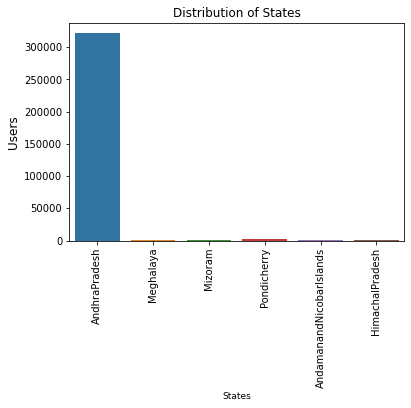

In [35]:
a = sns.countplot(df2['state'])

a.set_xticklabels(a.get_xticklabels(),rotation=90)

plt.title('Distribution of States')
plt.ylabel('Users', fontsize=12)
plt.xlabel('States', fontsize=9)
plt.show()

In [ ]:
# or 
df2.state.value_counts().plot(kind='bar')

**Observation**<br>
<b>AndhraPradesh has maximum users</b>

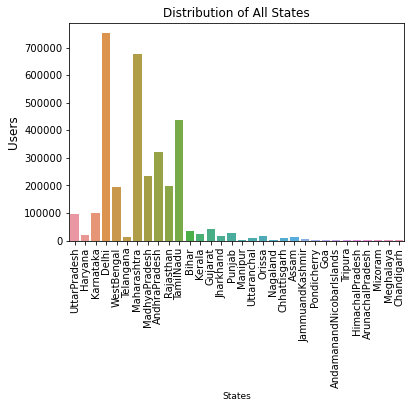

In [36]:
# Distribution of Users(device_id) across all the States.

b = sns.countplot(df1['state'])

b.set_xticklabels(b.get_xticklabels(),rotation=90)

plt.title('Distribution of All States')
plt.ylabel('Users', fontsize=12)
plt.xlabel('States', fontsize=9)
plt.show()

**2. Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).**

In [48]:
users_accross = df2['phone_brand'].value_counts().sort_values(ascending= False).head(10)
users_accross

Xiaomi         87276
Samsung        63055
Huawei         53339
OPPO           32489
vivo           30976
Meizu          19433
Coolpads       15965
HTC             4024
Lenovo          3439
Ningbo Bird     1949
Name: phone_brand, dtype: int64

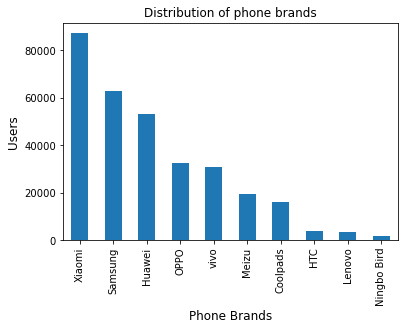

In [49]:
users_accross.plot(kind = 'bar')

plt.title('Distribution of phone brands')
plt.ylabel('Users', fontsize=12)
plt.xlabel('Phone Brands', fontsize=12)
plt.show()

<AxesSubplot:>

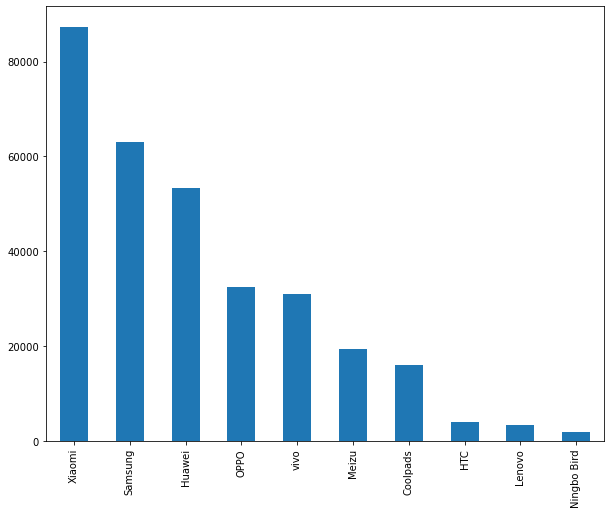

In [50]:
# or
plt.figure(figsize=(10,8))
df2.phone_brand.value_counts().head(10).plot(kind='bar')

<b>Top 5 brands are:</b>
<ol>
    <li>Xiaomi</li>
    <li>Samsung</li>
    <li>Huawei</li>
    <li>OPPO</li>
    <li>Vivo</li>
</ol>

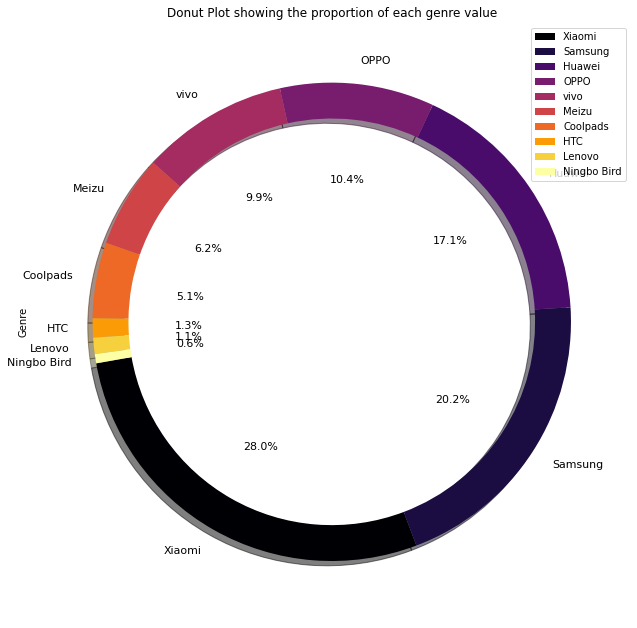

In [75]:
# or 
import numpy as np
space = np.ones(11)/10
df2['phone_brand'].value_counts().head(10).plot(kind='pie',  fontsize=11, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=190, figsize=(16,11), cmap='inferno', legend=True)

plt.ylabel('Genre')
plt.title('Donut Plot showing the proportion of each genre value')
plt.savefig('Donut plot total genre.png')

**3. Distribution of Users across Gender.**

In [53]:
g = df2['gender'].value_counts().sort_values(ascending= False)
g

M    211956
F    117216
Name: gender, dtype: int64

Text(0.5, 0, 'Gender')

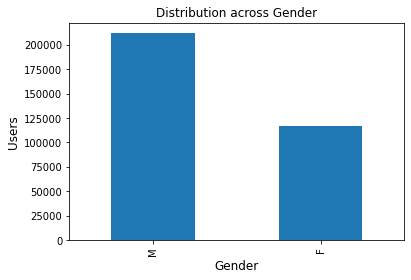

In [54]:
g.plot.bar()

plt.title('Distribution across Gender')
plt.ylabel('Users', fontsize=12)
plt.xlabel('Gender', fontsize=12)
# plt.show()

<b>There are more Male users than Females</b>

**4. Distribution of Users across Age Segments.**

Gender wise distribution of users for top brand

<AxesSubplot:xlabel='gender,phone_brand'>

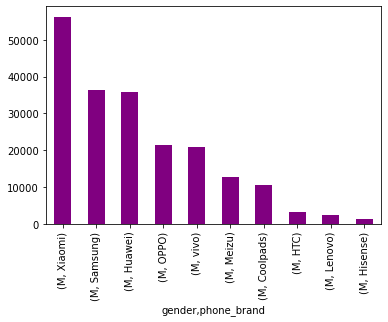

In [32]:
df2[df2.gender=='M'].groupby(['gender','phone_brand']).phone_brand.count().sort_values(ascending=False).head(10).plot(kind='bar',color='purple')

**Observation**
- In males, Xiaomi is most preferd then Samsung and Huawei have equal no. of male users

<AxesSubplot:xlabel='gender,phone_brand'>

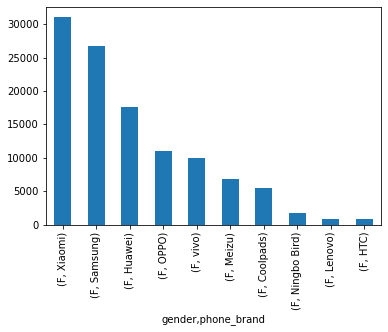

In [77]:
df2[df2.gender=='F'].groupby(['gender','phone_brand']).phone_brand.count().sort_values(ascending=False).head(10).plot(kind='bar')

**Observation**
- In Females, Most of them prefer Xiaomi and then Samsung

<b>5. Distribution of different Age Groups </b>

In [78]:
df2.age.sort_values().unique()

array([ 1, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79,
       80, 81, 84, 88], dtype=int64)

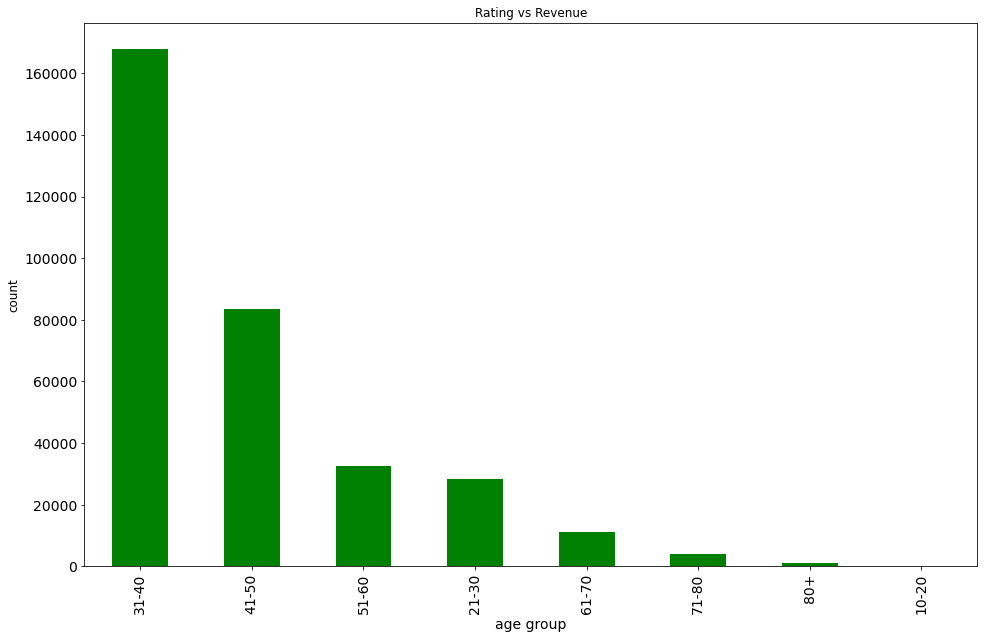

In [86]:
plt.figure(figsize= (16,10))     # Pandas cut() function is used to separate the array elements into different bins 
df2['merge_age_group'] = pd.cut(df2['age'],  
                               [1,10,20,30,40,50,60,70,80],
                                labels = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80','80+'], include_lowest=True)

df2.groupby(['merge_age_group'])['phone_brand'].count().sort_values(ascending=False).head(20).plot.bar(color='green',fontsize=14)
plt.ylabel('count', fontsize = 12)
plt.xlabel('age group',fontsize=14)

plt.title('Rating vs Revenue')
plt.savefig('runtime revenue.png')

# to understand Pandas.cut() method in Python
#https://www.geeksforgeeks.org/pandas-cut-method-in-python/#:~:text=cut()%20method%20in%20Python,-Difficulty%20Level%20%3A%20Basic&text=Pandas%20cut()%20function%20is,statistical%20analysis%20on%20scalar%20data.

**Observation**
- Top 3 Brands used by the age group 31-40 are : Xiamo, Samsung, Huawei

In [79]:
df2.head(2)

,device_id,gender,age,group,phone_brand,device_model,event_id,timestamp,longitude,latitude,city,state,Time_stamp,Date,Hour,Minute
0,-1.039701e+18,M,38,M32-38,Xiaomi,MI 4,2025632,2016-05-05 14:41:44,83.364566,17.788503,Visakhapatnam,AndhraPradesh,2016-05-05 14:41:44,2016-05-05,14,41
1,-1.039701e+18,M,38,M32-38,Xiaomi,MI 4,1824780,2016-05-07 10:53:16,83.364566,17.788503,Visakhapatnam,AndhraPradesh,2016-05-07 10:53:16,2016-05-07,10,53


<b> 6. Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender.</b>

<AxesSubplot:xlabel='group,phone_brand'>

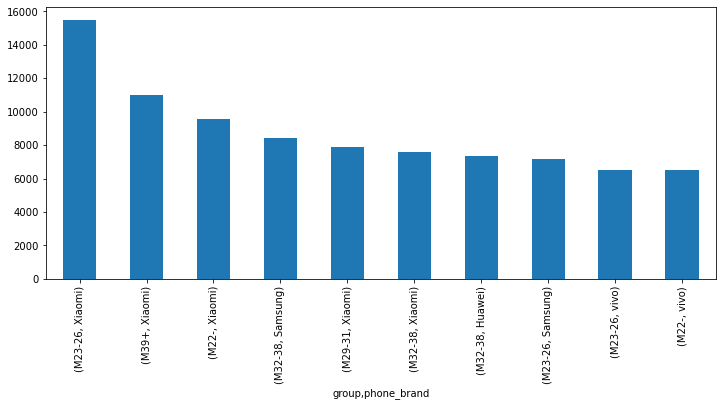

In [40]:
plt.figure(figsize=(12,5))
df2[df2.gender=='M'].groupby(['group','phone_brand'])['phone_brand'].count().sort_values(ascending = False).head(10).plot(kind='bar')

**Observation**
- Max Male users belonging of age group 23-26/39+/22 use Xiaomi
- Samsung is widely used in the age group 32-38

<AxesSubplot:xlabel='group,phone_brand'>

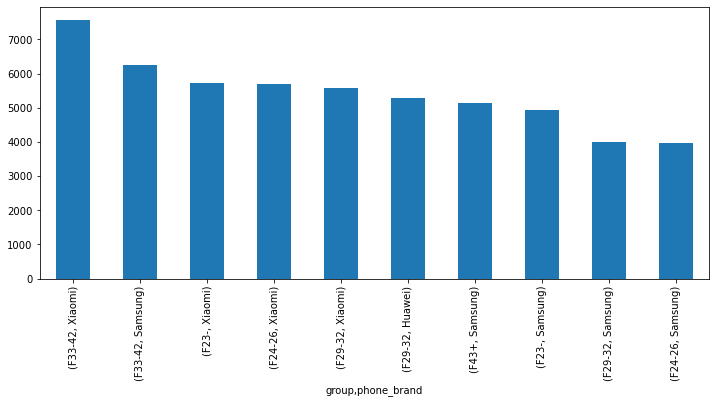

In [41]:
plt.figure(figsize=(12,5))
df2[df2.gender=='F'].groupby(['group','phone_brand'])['phone_brand'].count().sort_values(ascending = False).head(10).plot(kind='bar')

**Observation**
- Max Female users belonging to the age group of all 23-42 use Xiaomi
- Samsung is widely used in the age group 33-42, 43+

<b>7. Which Xiaomi model are most used?</b>

<AxesSubplot:xlabel='device_model'>

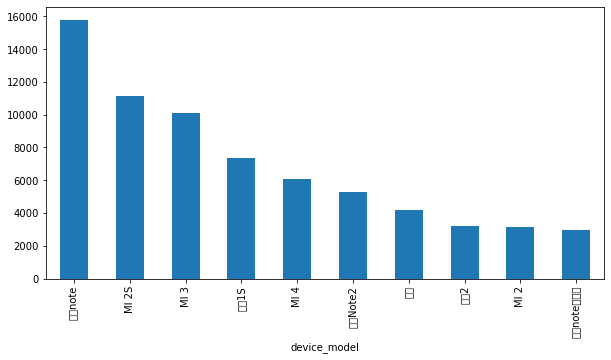

In [47]:
plt.figure(figsize=(10,5))
df2[df2.phone_brand=='Xiaomi'].groupby(['device_model'])['phone_brand'].count().sort_values(ascending= False).head(10).plot(kind='bar')

In [48]:
df2[df2.phone_brand=='Xiaomi'].groupby(['device_model'])['phone_brand'].count().sort_values(ascending= False).head(10)

device_model
红米note       15797
MI 2S        11162
MI 3         10115
红米1S          7382
MI 4          6046
红米Note2       5270
红米            4211
红米2           3178
MI 2          3168
红米note增强版     2983
Name: phone_brand, dtype: int64

**Observation**
- Top 5 models are:
1. Redmi Note
2. MI 2s
3. MI 3
4. Redmi 1S
5. MI 4

<b>8. Which Samsung model are most used?</b>

<AxesSubplot:xlabel='device_model'>

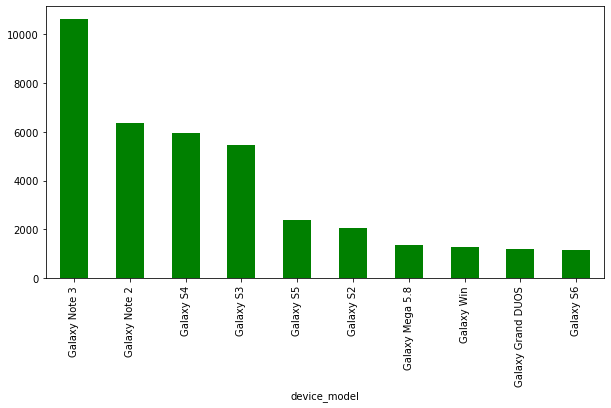

In [51]:
plt.figure(figsize=(10,5))
df2[df2.phone_brand=='Samsung'].groupby(['device_model'])['phone_brand'].count().sort_values(ascending= False).head(10).plot(kind='bar',color = 'green')

**Observation**
- Top 5 models are:
1. Galaxy Note 3
2. Galaxy Note 2
3. Galaxy S4
4. Galaxy S3
5. Galaxy S5

<b>9. Which Huawei model are most used?</b>

<AxesSubplot:xlabel='device_model'>

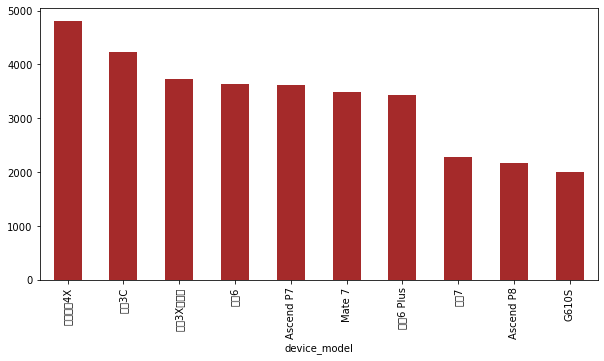

In [53]:
plt.figure(figsize=(10,5))
df2[df2.phone_brand=='Huawei'].groupby(['device_model'])['phone_brand'].count().sort_values(ascending= False).head(10).plot(kind='bar',color = 'brown')

In [54]:
df2[df2.phone_brand=='Huawei'].groupby(['device_model'])['phone_brand'].count().sort_values(ascending= False).head(10)

device_model
荣耀畅玩4X       4807
荣耀3C         4234
荣耀3X畅玩版      3725
荣耀6          3640
Ascend P7    3617
Mate 7       3495
荣耀6 Plus     3427
荣耀7          2289
Ascend P8    2165
G610S        2011
Name: phone_brand, dtype: int64

**Observation**
- Top 5 models are:
 1. 荣耀畅玩4X 
 2. 荣耀3C
 3. 荣耀3X畅玩版
 4. 荣耀6
 5. Ascend P7

<b>10. Which city has maximun usage of phones?<b>

In [55]:
df2.head(2)

,device_id,gender,age,group,phone_brand,device_model,event_id,timestamp,longitude,latitude,city,state,Time_stamp,Date,Hour,Minute
0,-1.039701e+18,M,38,M32-38,Xiaomi,MI 4,2025632,2016-05-05 14:41:44,83.364566,17.788503,Visakhapatnam,AndhraPradesh,2016-05-05 14:41:44,2016-05-05,14,41
1,-1.039701e+18,M,38,M32-38,Xiaomi,MI 4,1824780,2016-05-07 10:53:16,83.364566,17.788503,Visakhapatnam,AndhraPradesh,2016-05-07 10:53:16,2016-05-07,10,53


In [56]:
df2.groupby(['city'])['phone_brand'].count().sort_values(ascending= False).head(10)

city
Visakhapatnam    235772
Bodhan             1539
Sattenapalle       1521
PortBlair          1515
Kodar              1488
Rayadrug           1482
Shimla             1409
Ramagundam         1331
Palwancha          1298
Bhongir            1282
Name: phone_brand, dtype: int64

<AxesSubplot:xlabel='city'>

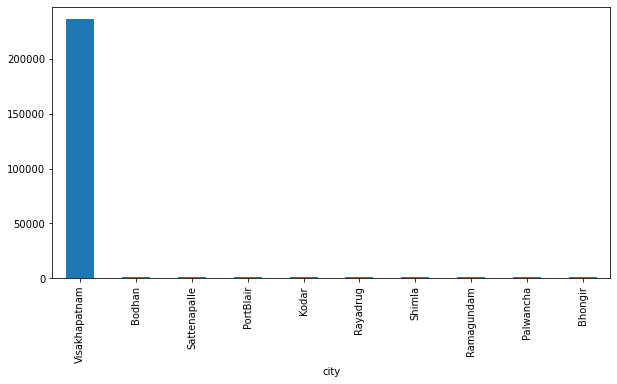

In [60]:
plt.figure(figsize=(10,5))
df2.groupby(['city'])['phone_brand'].count().sort_values(ascending= False).head(10).plot.bar()

<AxesSubplot:xlabel='phone_brand'>

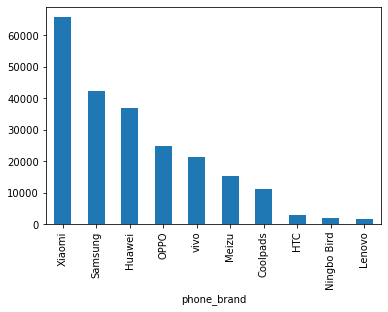

In [65]:
df2[df2.city=='Visakhapatnam'].groupby('phone_brand')['phone_brand'].count().sort_values(ascending=False).head(10).plot.bar()

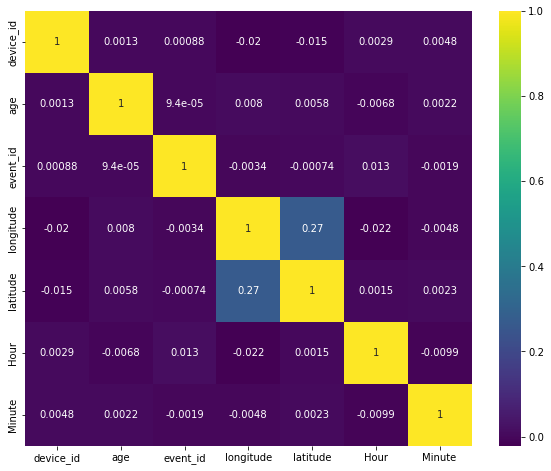

In [86]:
corr_mat = df2.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='viridis')
plt.savefig('correlation.png')

**Summary**
- Xiaomi has captured Maximum Market, main reason can be they are cheaper than Samsung
- Samsung always spend a lot of money for Research and Development  
- So, they are not able to sell their phone in a cheap budget,like Xiaomi
- The Chinese brand Xiaomi makes awesome configuration smartphones in a low cheap price
- Xiaomi really understands the demand of the Indian people. 
- They understand that the Indian people always want smartphone with fast Qualcomm Snapdragon Octa core processor, a long lasting battery life and awesome camera in a low mid rangen price segment.
- One specific feature which separates Redmi from the other brands is their IR blaster sensor
- Samsung and Huawei are making their way to become top but if Samsung wants to beat Xiaomi, it needs to find a way to reduce cost
- Brands like OPPO and Vivo need to come up with a unique technology at the same time sell at a comparable price as Xiaomi to capture more customers 
- All brands must target age group 31 to 40 which has maximum users